## Importing Data 

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pylab as pl
pl.rcParams['image.origin'] = 'lower' # make images display right-side-up
pl.style.use('dark_background')

In [3]:
import glob
import os

In [4]:
# import in files
os.chdir("\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 1\\Labs\\10_13_21")

In [5]:
biases = glob.glob("darks_40ms*.FIT")
biases

['darks_40ms001.FIT', 'darks_40ms002.FIT', 'darks_40ms003.FIT']

In [6]:
darks = glob.glob("darks_10s*.FIT")
darks

['darks_10s001.FIT', 'darks_10s002.FIT', 'darks_10s003.FIT']

In [7]:
clear_flat = glob.glob("twilight_1s_C*FIT")
clear_flat

['twilight_1s_C001.FIT', 'twilight_1s_C002.FIT', 'twilight_1s_C003.FIT']

## Biases & Readnoise

In [8]:
from astropy.io import fits

In [9]:
bias_timestream = [fits.getdata(x)*fits.getheader(x)['EGAIN'] for x in biases]
mean_bias = np.mean(bias_timestream, axis=0)
stddev_bias = np.std(bias_timestream, axis=0)
readnoise = np.mean(stddev_bias)

In [10]:
# aside: your computer may run out of memory from loading a bunch of files!
# To limit how much data is kept in memory, we can delete variables that contain a lot of data when we're done with them:
del bias_timestream

In [11]:
mean_bias_noise = readnoise / np.sqrt(len(biases))
mean_bias_noise

10.589290668785136

In [12]:
clear_flat_timestream = [fits.getdata(x)*fits.getheader(x)['EGAIN'] for x in clear_flat]
mean_clear_flat = np.mean(clear_flat_timestream, axis=0)
del clear_flat_timestream

In [13]:
bias_subtracted_clear_flat = mean_clear_flat - mean_bias
bias_subtracted_clear_flat

array([[26858.12      , 26712.42666667, 26409.14666667, ...,
        26356.37      , 26401.71333333, 25657.63666667],
       [26699.79      , 26467.87      , 26538.48666667, ...,
        26170.53666667, 26544.43333333, 25448.01666667],
       [26586.06      , 26453.00333333, 26421.78333333, ...,
        26123.70666667, 26638.09333333, 25653.92      ],
       ...,
       [26769.66333333, 26535.51333333, 26444.82666667, ...,
        26299.13333333, 26529.56666667, 25277.79333333],
       [26666.34      , 26479.76333333, 26296.90333333, ...,
        26215.13666667, 26638.83666667, 25309.01333333],
       [27154.71      , 26673.77333333, 26788.99      , ...,
        26369.00666667, 26815.75      , 25691.08666667]])

## Flat uncertainty

In [14]:
gain = fits.getheader("twilight_1s_C001.FIT")['EGAIN']
gain

2.23

In [15]:
flat_poisson_uncertainty = (bias_subtracted_clear_flat)**0.5
flat_poisson_uncertainty

array([[163.8844715 , 163.43936694, 162.50891258, ..., 162.34645053,
        162.48604043, 160.18001332],
       [163.40070379, 162.68948952, 162.90637393, ..., 161.77310242,
        162.9246247 , 159.52434506],
       [163.05232289, 162.64379279, 162.54778785, ..., 161.62829785,
        163.21180513, 160.16841137],
       ...,
       [163.61437386, 162.89724778, 162.61865412, ..., 162.17007533,
        162.87899394, 158.98991582],
       [163.29831597, 162.72603766, 162.16319969, ..., 161.91089113,
        163.21408232, 159.08806785],
       [164.78686234, 163.32107437, 163.67342484, ..., 162.38536469,
        163.75515259, 160.28439309]])

In [16]:
flat_singleframe_uncertainty = (flat_poisson_uncertainty**2 + readnoise**2)**0.5
flat_singleframe_uncertainty 

array([[164.90760816, 164.46527262, 163.54065518, ..., 163.37921909,
        163.51792735, 161.22666001],
       [164.4268507 , 163.72009416, 163.9356151 , ..., 162.80950801,
        163.9537513 , 160.57526552],
       [164.08064856, 163.67468517, 163.57928525, ..., 162.66562605,
        164.23913226, 161.21513338],
       ...,
       [164.63918903, 163.92654625, 163.64970485, ..., 163.20396001,
        163.90840704, 160.04434562],
       [164.32510225, 163.75641228, 163.19712793, ..., 162.94642033,
        164.2413952 , 160.14185138],
       [165.80443067, 164.34771846, 164.69787257, ..., 163.41788732,
        164.77909221, 161.3303626 ]])

In [17]:
flat_total_uncertainty = ((flat_singleframe_uncertainty/np.sqrt(len(clear_flat)))**2 + mean_bias_noise**2)**0.5
flat_total_uncertainty

array([[95.79651779, 95.54270446, 95.01218365, ..., 94.91955974,
        94.9991435 , 93.68463967],
       [95.52065826, 95.11513805, 95.23879659, ..., 94.59269727,
        95.24920261, 93.31097672],
       [95.32201295, 95.08908419, 95.03434782, ..., 94.51014959,
        95.41294775, 93.67802742],
       ...,
       [95.64249717, 95.23359315, 95.07475152, ..., 94.81900617,
        95.22318543, 93.00643669],
       [95.46227608, 95.13597601, 94.81508634, ..., 94.67124718,
        95.41424619, 93.06236582],
       [96.31114242, 95.47525298, 95.6761699 , ..., 94.94174552,
        95.72277413, 93.74412893]])

## Flat Normalizaion

In [18]:
mean_of_flat = np.mean(bias_subtracted_clear_flat)
mean_of_flat

25449.527938185445

In [19]:
normalized_mean_clear_flat = bias_subtracted_clear_flat / mean_of_flat
np.mean(normalized_mean_clear_flat)

0.9999999999999999

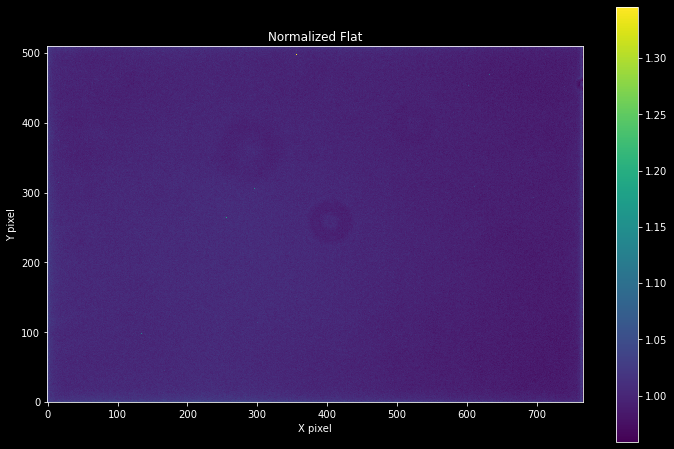

In [20]:
pl.figure(figsize=(12,8))

_=pl.imshow(normalized_mean_clear_flat, origin='lower', interpolation='none')
_=pl.colorbar()
_=pl.title("Normalized Flat")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")

## Normalized Flat Uncertainty

In [21]:
normalized_flat_uncertainty = flat_total_uncertainty / mean_of_flat
normalized_flat_uncertainty

array([[0.00376418, 0.0037542 , 0.00373336, ..., 0.00372972, 0.00373285,
        0.00368119],
       [0.00375334, 0.0037374 , 0.00374226, ..., 0.00371687, 0.00374267,
        0.00366651],
       [0.00374553, 0.00373638, 0.00373423, ..., 0.00371363, 0.0037491 ,
        0.00368093],
       ...,
       [0.00375812, 0.00374206, 0.00373582, ..., 0.00372577, 0.00374165,
        0.00365454],
       [0.00375104, 0.00373822, 0.00372561, ..., 0.00371996, 0.00374916,
        0.00365674],
       [0.0037844 , 0.00375155, 0.00375945, ..., 0.00373059, 0.00376128,
        0.00368353]])

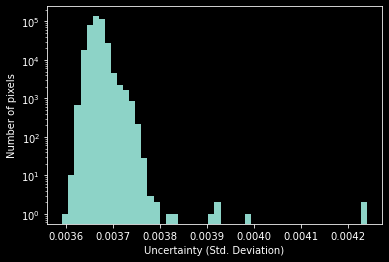

In [22]:
pl.xlabel("Uncertainty (Std. Deviation)")
pl.ylabel("Number of pixels")
_=pl.hist(normalized_flat_uncertainty.ravel(), bins=50, log=True)

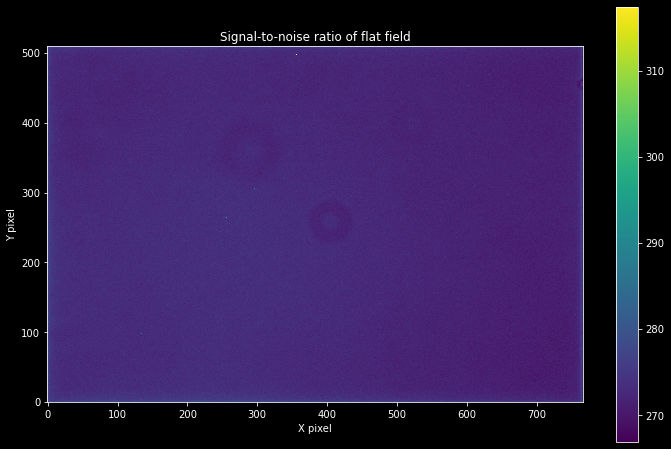

In [23]:
pl.figure(figsize=(12,8))
pl.title("Signal-to-noise ratio of flat field")
pl.imshow(normalized_mean_clear_flat / normalized_flat_uncertainty, origin='lower', interpolation='none')
pl.colorbar()
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")

## Dark Average

In [24]:
darks_30s = [fits.getdata(x)*fits.getheader(x)['EGAIN'] for x in darks]
average_30s_dark = np.mean(darks_30s, axis=0)
stddev_30s_dark = np.std(darks_30s, axis=0)
del darks_30s

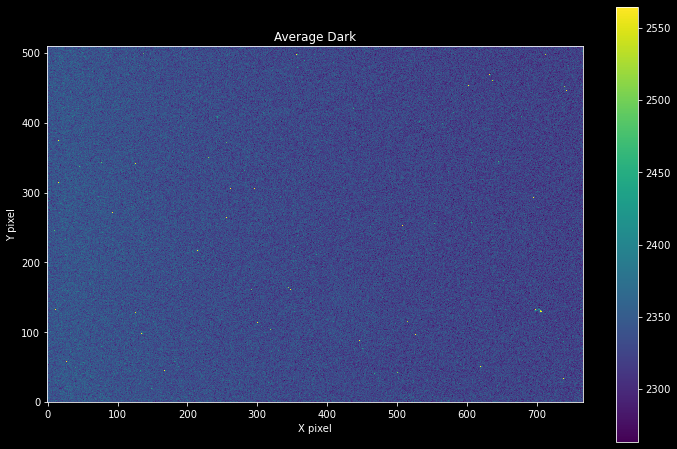

In [25]:
pl.figure(figsize=(12,8))
pl.imshow(average_30s_dark, origin='lower', interpolation='none', vmax=1150*gain)
pl.colorbar()
_=pl.title("Average Dark")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")

In [26]:
uncertainty_on_30s_mean_dark = stddev_30s_dark / np.sqrt(len(darks))
uncertainty_on_30s_mean_dark

array([[20.87518587, 12.67305219,  2.64554272, ...,  6.3365261 ,
        15.20960028,  6.83974388],
       [ 8.75325633,  4.58221441, 12.84626823, ...,  8.16539627,
        10.13771506,  4.967929  ],
       [ 6.42313411, 10.58217089, 13.12988449, ...,  7.58054234,
        14.14288121,  8.75325633],
       ...,
       [11.70602504,  6.3365261 ,  5.18560472, ..., 16.9940155 ,
         7.35862457, 11.33837176],
       [10.78900812, 10.31779513,  4.967929  , ...,  8.02891764,
        12.7165774 ,  3.64157475],
       [ 3.79027117,  7.60480014, 12.78879023, ...,  5.78973485,
         2.4277165 , 11.53165338]])

## Science Images -- Saturn B

In [27]:
fn = 'saturn_40ms_B_second001.FIT'
gain = fits.getheader(fn)['EGAIN']
saturn_clear = fits.getdata(fn)*gain
print(gain)
print(saturn_clear)

2.23
[[2361.57 2352.65 2359.34 ... 2337.04 2361.57 2310.28]
 [2301.36 2312.51 2314.74 ... 2323.66 2370.49 2348.19]
 [2381.64 2370.49 2359.34 ... 2350.42 2321.43 2348.19]
 ...
 [2370.49 2303.59 2334.81 ... 2321.43 2330.35 2330.35]
 [2361.57 2397.25 2316.97 ... 2339.27 2357.11 2296.9 ]
 [2350.42 2377.18 2390.56 ... 2334.81 2319.2  2316.97]]


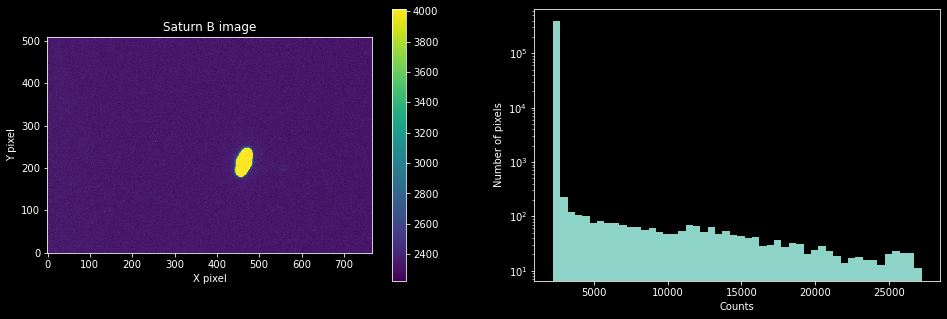

In [28]:
pl.figure(figsize=(16,5))
im = pl.subplot(1,2,1).imshow(saturn_clear, origin='lower', interpolation='none', vmax=1800*gain,)
_=pl.title("Saturn B image")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")
pl.colorbar(im)

_ = pl.subplot(1,2,2).hist(saturn_clear.ravel(), bins=50, log=True)
_ = pl.xlabel("Counts")
_ = pl.ylabel("Number of pixels")

In [29]:
saturn_clear_darksub = saturn_clear - average_30s_dark
saturn_clear_darksub

array([[ 31.96333333,   1.48666667,  17.09666667, ...,   7.43333333,
         26.01666667, -17.09666667],
       [-30.47666667, -44.6       , -52.77666667, ...,  -9.66333333,
         37.91      ,  31.96333333],
       [ 58.72333333,  59.46666667,   6.69      , ...,  15.61      ,
         22.3       ,  40.88333333],
       ...,
       [  8.92      , -36.42333333, -40.88333333, ...,   2.97333333,
         37.91      ,  12.63666667],
       [ 25.27333333,  46.08666667, -14.86666667, ...,  26.01666667,
         29.73333333,   4.46      ],
       [  0.        ,  43.85666667,  62.44      , ...,  18.58333333,
         -9.66333333,  -2.97333333]])

In [30]:
saturn_clear_darksub_uncertainty = (saturn_clear_darksub + readnoise**2 + uncertainty_on_30s_mean_dark**2)**0.5
saturn_clear_darksub_uncertainty

<ipython-input-30-ed54c4f7b3a7>:1: RuntimeWarning: invalid value encountered in sqrt
  saturn_clear_darksub_uncertainty = (saturn_clear_darksub + readnoise**2 + uncertainty_on_30s_mean_dark**2)**0.5


array([[28.35729093, 22.32693775, 18.98670044, ..., 19.59551293,
        24.3669415 , 19.13333897],
       [19.55868248, 17.68603742, 21.18134017, ..., 19.83455554,
        21.84221823, 19.82530914],
       [20.88969162, 22.53548841, 22.70425285, ..., 20.23546028,
        23.63726548, 21.30497736],
       ...,
       [21.96247374, 18.44254484, 17.95567859, ..., 25.06330239,
        20.6992412 , 21.8539372 ],
       [21.8649322 , 22.11205087, 18.60679667, ..., 20.66106037,
        22.97485375, 18.81808431],
       [18.72873157, 20.93057291, 23.71481364, ..., 19.7104945 ,
        18.23813874, 21.59641005]])

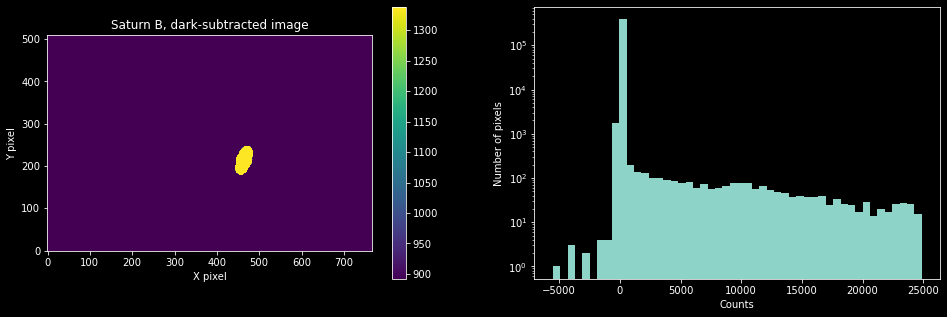

In [31]:
pl.figure(figsize=(16,5))
im = pl.subplot(1,2,1).imshow(saturn_clear_darksub, origin='lower', interpolation='none', vmax=600*gain, vmin=400*gain)
_=pl.title("Saturn B, dark-subtracted image")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")
pl.colorbar(im)

_ = pl.subplot(1,2,2).hist(saturn_clear_darksub.ravel(), bins=50, log=True)
_ = pl.xlabel("Counts")
_ = pl.ylabel("Number of pixels")

In [32]:
saturn_clear_darksub_flattened = saturn_clear_darksub / normalized_mean_clear_flat
saturn_clear_darksub_flattened 

array([[ 30.28699494,   1.41638067,  16.47543184, ...,   7.17757507,
         25.07836809, -16.95799584],
       [-29.04954607, -42.88403056, -50.61107175, ...,  -9.39710464,
         36.34628745,  31.96523153],
       [ 56.21295943,  57.21084202,   6.44382477, ...,  15.2071502 ,
         21.30499604,  40.55760421],
       ...,
       [  8.48011372, -34.93268163, -39.34461538, ...,   2.87727846,
         36.36665522,  12.72251882],
       [ 24.12008557,  44.29359493, -14.38761226, ...,  25.25685422,
         28.40586873,   4.48476174],
       [  0.        ,  41.84377852,  59.31797072, ...,  17.93533851,
         -9.17100106,  -2.94537677]])

In [33]:
saturn_clear_darksub_flattened_uncertainty = ((
    saturn_clear_darksub_uncertainty**2 / saturn_clear_darksub**2 +
    normalized_flat_uncertainty**2 / normalized_mean_clear_flat**2
) * saturn_clear_darksub_flattened**2)**0.5
saturn_clear_darksub_flattened_uncertainty

<ipython-input-33-3561be5d5079>:2: RuntimeWarning: divide by zero encountered in true_divide
  saturn_clear_darksub_uncertainty**2 / saturn_clear_darksub**2 +
<ipython-input-33-3561be5d5079>:1: RuntimeWarning: invalid value encountered in multiply
  saturn_clear_darksub_flattened_uncertainty = ((


array([[26.870291  , 21.2713749 , 18.29688422, ..., 18.92130893,
        23.48831407, 18.97824974],
       [18.64310432, 17.00627157, 20.31301427, ..., 19.28813553,
        20.94167604, 19.82683294],
       [19.99769026, 21.68159643, 21.86880554, ..., 19.71331725,
        22.58272299, 21.13575344],
       ...,
       [20.87942499, 17.68821444, 17.2804632 , ..., 24.25362329,
        19.85698847, 22.0024603 ],
       [20.86739188, 21.25234377, 18.00729731, ..., 20.05786491,
        21.9493618 , 18.92256873],
       [        nan, 19.97048466, 22.5300579 , ..., 19.02330554,
        17.30896401, 21.39335394]])

In [34]:
saturn_clear_darksub_flattened_uncertainty = ((
    saturn_clear_darksub_uncertainty**2 / normalized_mean_clear_flat**2 +
    normalized_flat_uncertainty**2 * saturn_clear_darksub**2 / normalized_mean_clear_flat**4
))**0.5

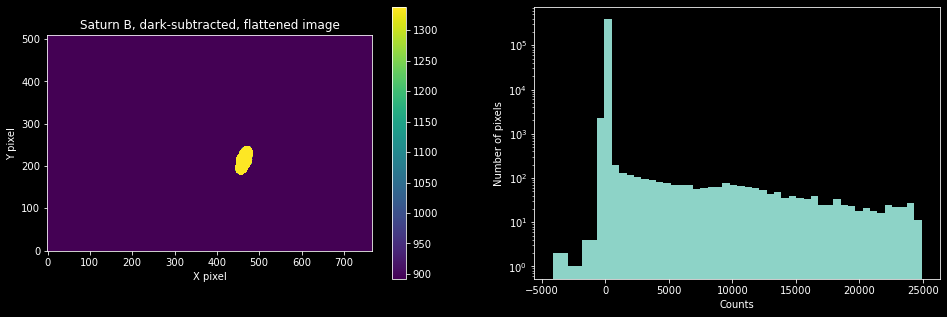

In [41]:
pl.figure(figsize=(16,5))
im = pl.subplot(1,2,1).imshow(saturn_clear_darksub_flattened, origin='lower', interpolation='none', vmax=600*gain, vmin=400*gain)
pl.colorbar(im)
_=pl.title("Saturn B, dark-subtracted, flattened image")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")

_ = pl.subplot(1,2,2).hist(saturn_clear_darksub_flattened.ravel(), bins=50, log=True)
_ = pl.xlabel("Counts")
_ = pl.ylabel("Number of pixels")

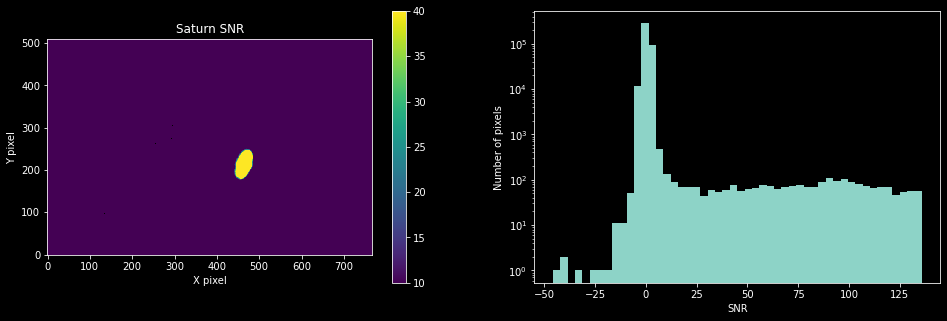

In [40]:
pl.figure(figsize=(16,5))
SNR = saturn_clear_darksub_flattened / saturn_clear_darksub_flattened_uncertainty
im = pl.subplot(1,2,1).imshow(SNR, origin='lower', interpolation='none', vmin=10, vmax=40)
_=pl.title("Saturn SNR")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")
pl.colorbar(im)

_ = pl.subplot(1,2,2).hist(SNR.ravel(), bins=50, log=True)
_ = pl.xlabel("SNR")
_ = pl.ylabel("Number of pixels")

## Jupiter Clear 40 ms

In [45]:
fn = 'jupiter_40ms_great_C001.FIT'
gain = fits.getheader(fn)['EGAIN']
jupiter_clear = fits.getdata(fn)*gain
print(gain)
print(jupiter_clear)

2.23
[[2330.35 2392.79 2345.96 ... 2339.27 2299.13 2368.26]
 [2357.11 2303.59 2374.95 ... 2285.75 2345.96 2312.51]
 [2283.52 2316.97 2359.34 ... 2341.5  2337.04 2348.19]
 ...
 [2399.48 2368.26 2308.05 ... 2341.5  2395.02 2390.56]
 [2328.12 2377.18 2337.04 ... 2350.42 2372.72 2397.25]
 [2345.96 2415.09 2352.65 ... 2368.26 2341.5  2381.64]]


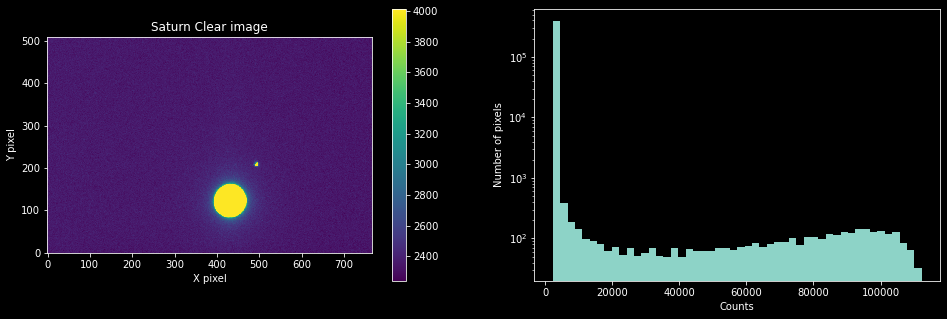

In [46]:
pl.figure(figsize=(16,5))
im = pl.subplot(1,2,1).imshow(jupiter_clear, origin='lower', interpolation='none', vmax=1800*gain,)
_=pl.title("Saturn Clear image")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")
pl.colorbar(im)

_ = pl.subplot(1,2,2).hist(jupiter_clear.ravel(), bins=50, log=True)
_ = pl.xlabel("Counts")
_ = pl.ylabel("Number of pixels")

In [47]:
jupiter_clear_darksub = jupiter_clear - average_30s_dark
jupiter_clear_darksub

array([[  0.74333333,  41.62666667,   3.71666667, ...,   9.66333333,
        -36.42333333,  40.88333333],
       [ 25.27333333, -53.52      ,   7.43333333, ..., -47.57333333,
         13.38      ,  -3.71666667],
       [-39.39666667,   5.94666667,   6.69      , ...,   6.69      ,
         37.91      ,  40.88333333],
       ...,
       [ 37.91      ,  28.24666667, -67.64333333, ...,  23.04333333,
        102.58      ,  72.84666667],
       [ -8.17666667,  26.01666667,   5.20333333, ...,  37.16666667,
         45.34333333, 104.81      ],
       [ -4.46      ,  81.76666667,  24.53      , ...,  52.03333333,
         12.63666667,  61.69666667]])

In [48]:
jupiter_clear_darksub_uncertainty = (jupiter_clear_darksub + readnoise**2 + uncertainty_on_30s_mean_dark**2)**0.5
jupiter_clear_darksub_uncertainty

<ipython-input-48-c7bebc3c0ead>:1: RuntimeWarning: invalid value encountered in sqrt
  jupiter_clear_darksub_uncertainty = (jupiter_clear_darksub + readnoise**2 + uncertainty_on_30s_mean_dark**2)**0.5


array([[27.80136596, 23.20844995, 18.63101698, ..., 19.65233133,
        23.05011579, 20.59283031],
       [20.93542596, 17.43203716, 22.55790707, ..., 18.85469686,
        21.2732813 , 18.90404408],
       [18.3918247 , 21.31497685, 22.70425285, ..., 20.01384153,
        23.96518974, 21.30497736],
       ...,
       [22.61283381, 20.11957903, 17.19437098, ..., 25.46054059,
        22.20649874, 23.19061386],
       [21.08613905, 21.6534707 , 19.13851829, ..., 20.9291523 ,
        23.31209782, 21.31830897],
       [18.60928226, 21.81739862, 22.90158043, ..., 20.54150904,
        18.83957814, 23.04506296]])

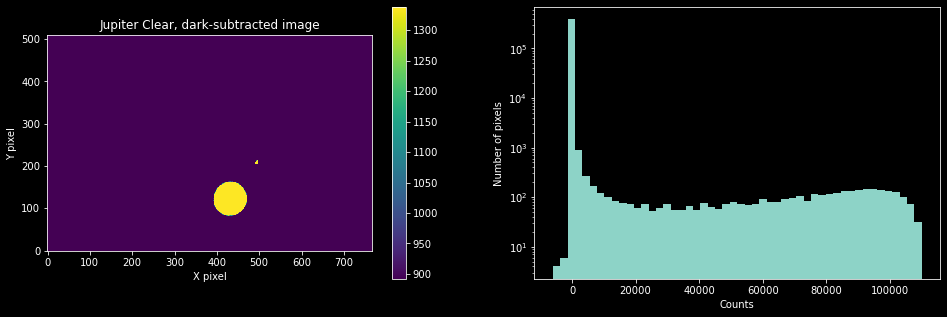

In [49]:
pl.figure(figsize=(16,5))
im = pl.subplot(1,2,1).imshow(jupiter_clear_darksub, origin='lower', interpolation='none', vmax=600*gain, vmin=400*gain)
_=pl.title("Jupiter Clear, dark-subtracted image")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")
pl.colorbar(im)

_ = pl.subplot(1,2,2).hist(jupiter_clear_darksub.ravel(), bins=50, log=True)
_ = pl.xlabel("Counts")
_ = pl.ylabel("Number of pixels")

In [50]:
jupiter_clear_darksub_flattened = jupiter_clear_darksub / normalized_mean_clear_flat
jupiter_clear_darksub_flattened 

array([[  0.70434872,  39.65865885,   3.58161562, ...,   9.3308476 ,
        -35.10971533,  40.55172919],
       [ 24.08986748, -51.46083668,   7.12831996, ..., -46.26266902,
         12.82810145,  -3.71688739],
       [-37.71249177,   5.7210842 ,   6.44382477, ...,   6.51735009,
         36.21849327,  40.55760421],
       ...,
       [ 36.04048329,  27.09065106, -65.09745453, ...,  22.29890803,
         98.4038906 ,  73.34157907],
       [ -7.8035571 ,  25.00444875,   5.03566429, ...,  36.08122032,
         43.31894981, 105.39190082],
       [ -4.17993396,  78.01382436,  23.3034885 , ...,  50.21894784,
         11.99284754,  61.11656787]])

In [51]:
jupiter_clear_darksub_flattened_uncertainty = ((
    jupiter_clear_darksub_uncertainty**2 / jupiter_clear_darksub**2 +
    normalized_flat_uncertainty**2 / normalized_mean_clear_flat**2
) * jupiter_clear_darksub_flattened**2)**0.5
jupiter_clear_darksub_flattened_uncertainty

<ipython-input-51-9db2556db7d0>:2: RuntimeWarning: divide by zero encountered in true_divide
  jupiter_clear_darksub_uncertainty**2 / jupiter_clear_darksub**2 +
<ipython-input-51-9db2556db7d0>:1: RuntimeWarning: invalid value encountered in multiply
  jupiter_clear_darksub_flattened_uncertainty = ((


array([[26.34330485, 22.11166573, 17.9540337 , ..., 18.97618449,
        22.21916588, 20.42633883],
       [19.95527594, 16.76236576, 21.63229934, ..., 18.33600491,
        20.39585245, 18.90517164],
       [17.60610865, 20.50641905, 21.86880554, ..., 19.49735534,
        22.89625418, 21.13575344],
       ...,
       [21.49807645, 19.2964154 , 16.54888484, ..., 24.63815748,
        21.3053833 , 23.34972777],
       [20.1239766 , 20.81120345, 18.52181924, ..., 20.31833768,
        22.27185405, 21.44016994],
       [17.44071728, 20.81791898, 21.75664986, ..., 19.82605779,
        17.87978127, 22.82947254]])

In [52]:
jupiter_clear_darksub_flattened_uncertainty = ((
    jupiter_clear_darksub_uncertainty**2 / normalized_mean_clear_flat**2 +
    normalized_flat_uncertainty**2 * jupiter_clear_darksub**2 / normalized_mean_clear_flat**4
))**0.5

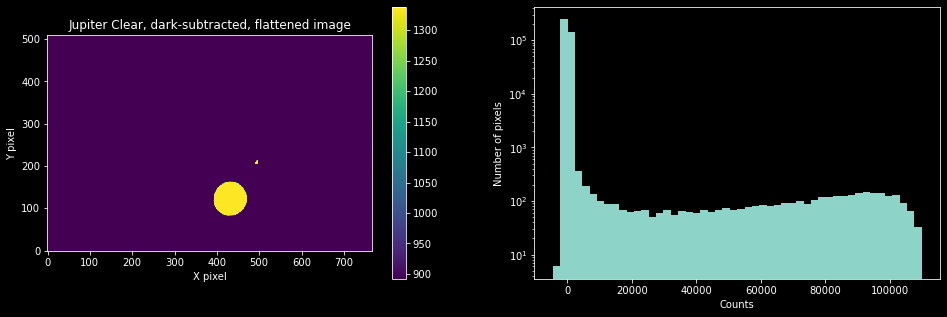

In [53]:
pl.figure(figsize=(16,5))
im = pl.subplot(1,2,1).imshow(jupiter_clear_darksub_flattened, origin='lower', interpolation='none', vmax=600*gain, vmin=400*gain)
pl.colorbar(im)
_=pl.title("Jupiter Clear, dark-subtracted, flattened image")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")

_ = pl.subplot(1,2,2).hist(jupiter_clear_darksub_flattened.ravel(), bins=50, log=True)
_ = pl.xlabel("Counts")
_ = pl.ylabel("Number of pixels")

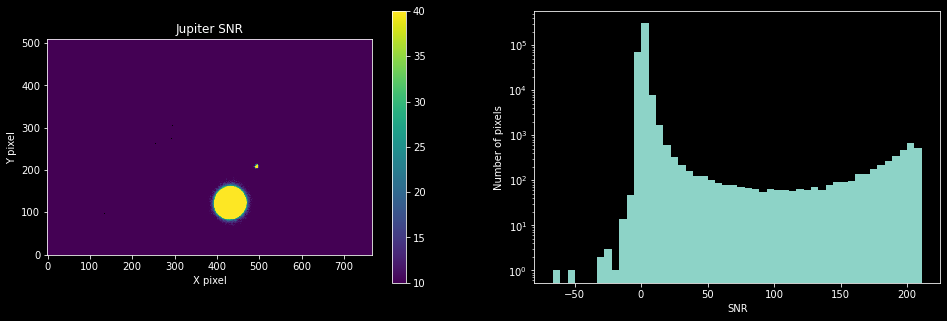

In [54]:
pl.figure(figsize=(16,5))
SNR = jupiter_clear_darksub_flattened / jupiter_clear_darksub_flattened_uncertainty
im = pl.subplot(1,2,1).imshow(SNR, origin='lower', interpolation='none', vmin=10, vmax=40)
_=pl.title("Jupiter SNR")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")
pl.colorbar(im)

_ = pl.subplot(1,2,2).hist(SNR.ravel(), bins=50, log=True)
_ = pl.xlabel("SNR")
_ = pl.ylabel("Number of pixels")